# Hypothesis Test


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


# Membuat titik data untuk diuji (Fase-1)

In [2]:
np.random.seed(100) 

#membangkitkan distribusi seragam dengan panjang 50000
distri = np.random.rand(1,50000) 

#membangkitkan distribusi Normal dengan panjang 50000
distri_gaussian = np.random.normal(loc=np.mean(distri),scale=np.std(distri),size=(1,50000)) 

#membangkitkan distribusi seragam dengan panjang 50000 dengan rata-rata dan standard deviasi yang berbeda
distri_gaussian_2 = np.random.normal(loc=np.mean(distri)+1,scale=np.std(distri)+0.5,size=(1,50000))

#----------------------------------------------------------------------------------------------------
distri[0:10]

array([[0.54340494, 0.27836939, 0.42451759, ..., 0.44731106, 0.09023059,
        0.93373202]])

# Menampilkan Ditribusi 

[Text(0.5, 0, 'Distribusi'),
 Text(0, 0.5, 'Kepadatan Peluang'),
 Text(0.5, 1.0, 'Perbandingan Kepadatan Peluang')]

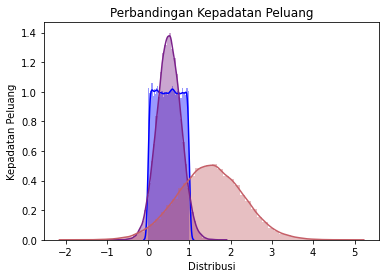

In [7]:
ax = sns.distplot(distri,kde=True,color='b')
ax = sns.distplot(distri_gaussian,kde=True,color='#7B228B')
ax = sns.distplot(distri_gaussian_2,kde=True,color='#C55F68')

#-----------------------------------------------------------------------------------------------------------
ax.set(xlabel='Distribusi',ylabel='Kepadatan Peluang',title='Perbandingan Kepadatan Peluang')

# T-test Hypotesis

Uji T satu sampel adalah salah satu uji dalam analisis data yang melibatkan satu kelompok sampel dan menggunakan distribusi t-student dalam pengambilan keputusannya. Uji ini termasuk dalam uji parametrik, sehingga memerlukan beberapa asusmi yang harus dipenuhi oleh data sebelum melakukan pengujian.

Asumsi-asumsi tersebut adalah:

1. Variabel uji kontinu, baik berupa interval maupun ratio.
2. Data sample berdistribusi normal (secara aproksimasi).
3. Skor-skor pada variabel uji saling bebas satu sama lain.

Tujuan dari uji ini pada umumnya adalah untuk menguji perbedaan statistik antara nilai rata-rata populasi dengan suatu nilai tertentu (nilai yang dihipotesakan). Hipotesis yang pada uji adalah sebagai berikut.

 1. H0= Mean Populasi adalah x
 2. H1= Mean Populasi Bukan x 

# Pembangkitan Data (Sample)

[15.00469054 56.85360807 73.06071605 44.95127927 69.62641574]


<AxesSubplot:ylabel='Density'>

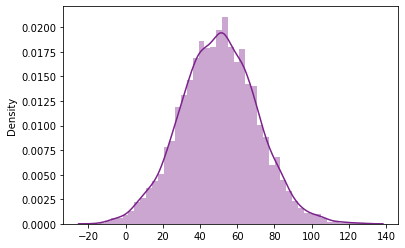

In [10]:
np.random.seed(100) 

distri_norm = np.random.normal(50,20,5000) #mean=50, std dev=20,n=50

print(distri_norm[0:5])#Menampilkan Hasil Bangkitan Data
sns.distplot(distri_norm,color='#7B228B')

In [28]:
from scipy.stats import t #menginpor T-tabel
def one_tailed_ttest(distri_norm_gen,hypo_mean_gen,mode,alpha = 0.05):

    mean_sample = np.mean(distri_norm_gen)
    print('Rata-Rata Sampel:',mean_sample)

    n = len(distri_norm_gen)
    print('Jumlah Observasi :',n)

    std_sample = np.std(distri_norm_gen, ddof=1) #degree of freedom=n-1. Dimana n adalah ukuran sampel
    print('Standard Deviasi Sampel :',std_sample)

    hypo_mean = hypo_mean_gen #Hipotesis
    print('Rata-rata yang Dihopotesis:',hypo_mean) 

    #---------------------------------------------------------------- 
    #menghitung t-statistic yang akan diuji
    t_stat = ((mean_sample - hypo_mean)/std_sample)*np.sqrt(n)
    print('T-statistic :',t_stat)
    
    #Pendekatan dengan two-tailed/one-tailed
    if mode=='less':
        
        #Menghitung Nilai Kritis t
        t_critical = t.ppf(alpha,n-1)
        print('Nilai Kritis t:',t_critical)
        
        # Validasi Dengan CDF
        p_val = t.cdf(t_stat,n-1)
        print('p-value dengan t_statistic :',p_val)
        
        print('#------------------------ Keputusan -----------------------------#')
        if t_stat<=t_critical:
            print('H0 Ditolak')
        else:
            print('H0 Diterima')


    elif mode=='greater':
        #Menghitung Nilai Kritis t
        t_critical = t.ppf(1-alpha,n-1)
        print('Nilai Kritis t',t_critical)

        # Validasi Dengan CDF
        p_val = 1-t.cdf(t_stat,n-1)
        print('p-value dengan t_statistic :',p_val)
        
        print('#------------------------ Keputusan -----------------------------#')
        if t_stat>=t_critical:
            print('H0 Ditolak')
        else:
            print('H0 Diterima')

            
    elif mode=='two-sided':
        #Menghitung Nilai Kritis t
        t_critical = t.ppf(1-(alpha/2),n-1)
        print('Nilai Kritis t:',-t_critical,'&',t_critical)
    
        # Validasi dengan CDF
        if t_stat>=t_critical:
            p_val = 2*(1-t.cdf(t_stat,n-1)) #dengan uji two tailed
        elif t_stat<=-t_critical:
            p_val = 2*t.cdf(t_stat,n-1) #Same explanation as above
        
        print('p-value dengan t_statistic :',p_val)

        print('#------------------------ Keputusan -----------------------------#')
        if (t_stat<=-t_critical) | (t_stat>=t_critical):
            print('H0 Ditolak')
        else:
            print('H0 Diterima')
            

    
one_tailed_ttest(distri_norm_gen=distri_norm,hypo_mean_gen=40,mode='two-sided',alpha = 0.05)

Rata-Rata Sampel: 50.173662560551264
Jumlah Observasi : 5000
Standard Deviasi Sampel : 20.35079223428461
Rata-rata yang Dihopotesis: 40
T-statistic : 35.34931565931924
Nilai Kritis t: -1.9604386466615242 & 1.9604386466615242
p-value dengan t_statistic : 0.0
#------------------------ Code Manual -----------------------------#
H0 Ditolak
